In [1]:
###############################################################################################################################
# MLOps -  DevOps + Data Science = MLOps
###############################################################################################################################

In [10]:
#Intalar pacotes

if False:
    !pip install pandas
    !pip install sklearn
    !pip install matplotlib 

In [11]:
#Imports 

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
#Parâmetros

#Semente para números aleatórios
seed = 52

In [13]:
df_heart = pd.read_csv('SAHeart.csv', index_col=0)
df_heart.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ID,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [14]:
df_heart.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [15]:
#Dummies
df_heart = pd.get_dummies(df_heart, columns = ['famhist'], drop_first=True)

In [16]:
#Divisão treino e teste
y = df_heart.pop('chd')
X_train, X_test, y_train, y_test = train_test_split(df_heart, y, test_size=0.25, random_state=seed)

In [17]:
# Treinar o modelo
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [18]:
#Avaliação do treino
train_score = model.score(X_train, y_train) * 100

# Avaliação do teste
test_score = model.score(X_test, y_test) * 100

In [19]:
#Salvar as métrica em um arquivo
with open("metrics.txt", 'w') as outfile:
        outfile.write("variancia_treino: %2.1f%%\n" % train_score)
        outfile.write("variaancia_teste: %2.1f%%\n" % test_score)

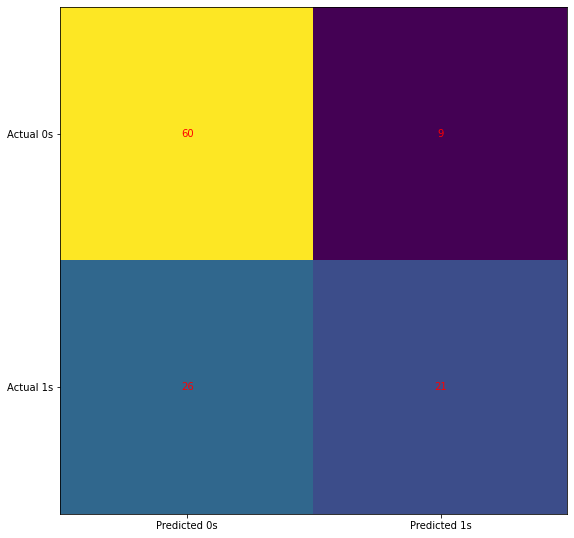

In [23]:
# Confusion Matrix and plot
cm = confusion_matrix(y_test, model.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.tight_layout()
plt.savefig("cm.png",dpi=120) 
#plt.close()

In [21]:
#Imprimir a avaliação do teste
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77        69
           1       0.70      0.45      0.55        47

    accuracy                           0.70       116
   macro avg       0.70      0.66      0.66       116
weighted avg       0.70      0.70      0.68       116



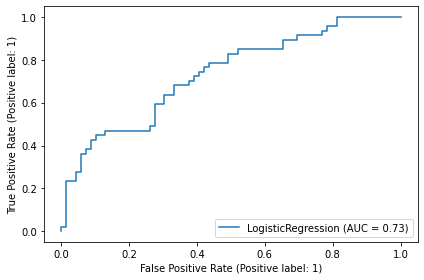

In [22]:
#Curva ROC
model_ROC = plot_roc_curve(model, X_test, y_test)
plt.tight_layout()
plt.savefig("roc.png",dpi=120) 
#plt.close()

In [24]:
#Fechar os plots
plt.close()